## Q1

In [1]:
from sympy.geometry import Point, Line, Polygon


def make_Point(p):
    if not isinstance(p, Point):
        return Point(p)
    else:
        return p


def make_Polygon(poly):
    if not isinstance(poly, Polygon):
        return Polygon(*poly)
    else:
        return poly


def get_line_through_points(p1, p2):
    p1 = make_Point(p1)
    p2 = make_Point(p2)
    return Line(p1, p2)


def get_distance_between_points(p1, p2):
    p1 = make_Point(p1)
    p2 = make_Point(p2)
    return float(p1.distance(p2))


def get_distance_between_point_and_line(p, l):
    p = make_Point(p)
    return float(l.distance(p))


def get_distace_between_point_and_polygon(p, poly):
    p = make_Point(p)
    poly = make_Polygon(poly)
    return float(poly.distance(p))


def get_tangent_vector_to_polygon(poly):
    poly = make_Polygon(poly)
    slopes = []
    for ls in poly.sides:
        slopes.append(float(ls.slope))
    return slopes


def get_intersection_between_polygons(poly1, poly2):
    poly1 = make_Polygon(poly1)
    poly2 = make_Polygon(poly2)
    return poly1.intersection(poly2)


## Q7

### Our Environment

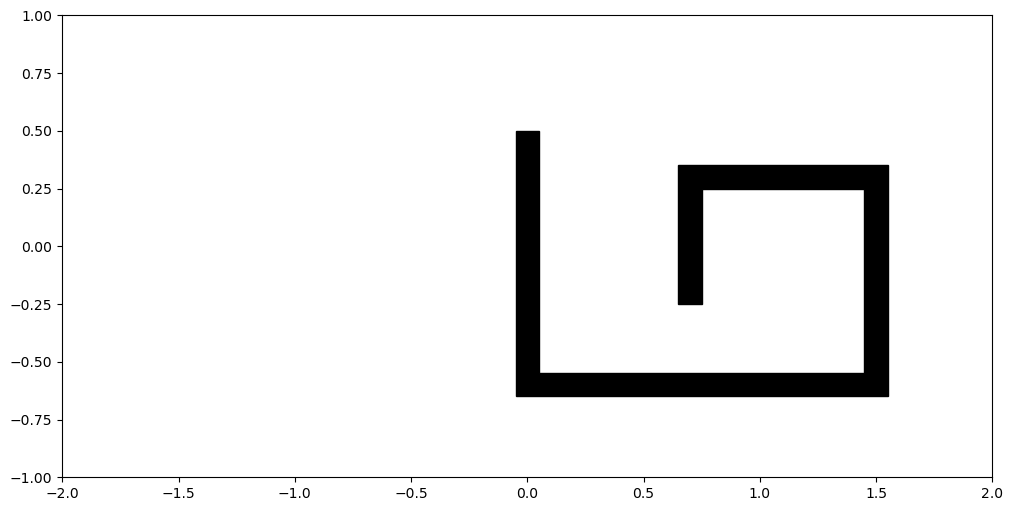

In [3]:
import matplotlib.pyplot as plt

environment = make_Polygon(((-0.05, 0.5), (0.05, 0.5), (0.05, -0.55), (1.45, -0.55), (1.45, 0.25), (0.75, 0.25),
                            (0.75, -0.25), (0.65, -0.25), (0.65, 0.35), (1.55, 0.35), (1.55, -0.65), (-0.05, -0.65)))

fig, ax = plt.subplots(figsize=(12, 6))

plt.fill([environment.vertices[i].x for i in range(len(environment.vertices))], [
         environment.vertices[i].y for i in range(len(environment.vertices))], color='black')

ax.set_xlim([-2, 2])
ax.set_ylim([-1, 1])

plt.show()

### Automated Trapezoidal Decomposition

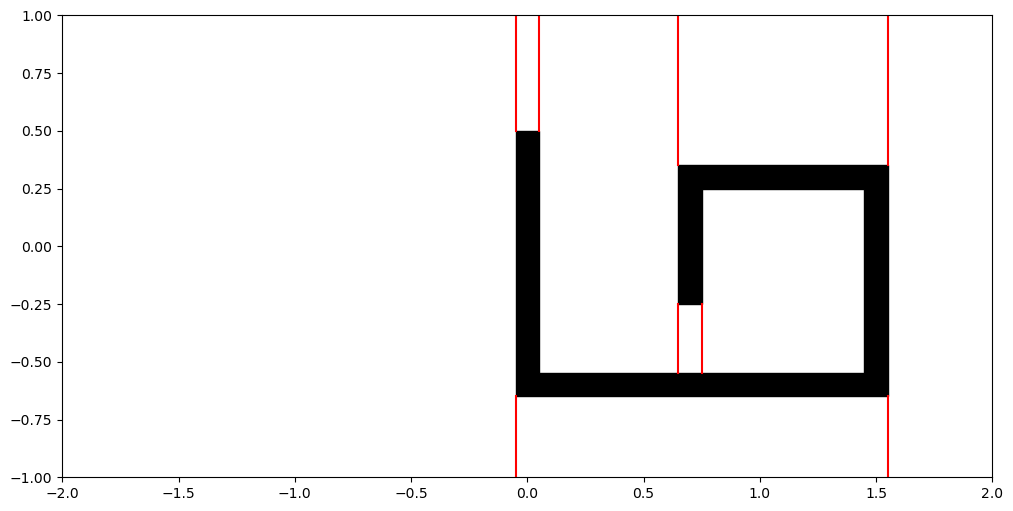

In [4]:
from sympy.geometry.line import Segment


def trapezoidal_decomposition(poly):
    vertices = poly.vertices
    lexicographical_order = sorted(vertices, key=lambda p: p.x, reverse=False)
    segments = []
    for vertice in lexicographical_order:
        top_line = Segment(vertice, Point(vertice.x, 1))
        top_line_intersections = list(poly.intersection(top_line))
        done = 0
        all_points = []
        for item in top_line_intersections:
            if isinstance(item, Segment):
                all_points.append(item.p1)
                all_points.append(item.p2)
                if vertice in (item.p1, item.p2):
                    done = 1
            elif isinstance(item, Point):
                all_points.append(item)
        all_points.remove(vertice)
        if len(all_points) == 0 and done == 0:
            segments.append(Segment(vertice, Point(vertice.x, 1)))
        elif done == 0:
            y_order = sorted(all_points, key=lambda p: p.y, reverse=False)
            req_point = y_order[0]
            if poly.encloses_point(temp_seg.midpoint):
                pass
            else:
                segments.append(temp_seg)

        bottom_line = Segment(vertice, Point(vertice.x, -1))
        bottom_line_intersections = list(poly.intersection(bottom_line))
        done = 0
        all_points = []
        for item in bottom_line_intersections:
            if isinstance(item, Segment):
                all_points.append(item.p1)
                all_points.append(item.p2)
                if vertice in (item.p1, item.p2):
                    done = 1
            elif isinstance(item, Point):
                all_points.append(item)
        all_points.remove(vertice)
        if len(all_points) == 0 and done == 0:
            segments.append(Segment(vertice, Point(vertice.x, -1)))
        elif done == 0:
            y_order = sorted(all_points, key=lambda p: p.y, reverse=False)
            req_point = y_order[-1]
            temp_seg = Segment(vertice, req_point)
            if poly.encloses_point(temp_seg.midpoint):
                pass
            else:
                segments.append(temp_seg)
    return list(set(segments))


fig, ax = plt.subplots(figsize=(12, 6))

plt.fill([environment.vertices[i].x for i in range(len(environment.vertices))], [
         environment.vertices[i].y for i in range(len(environment.vertices))], color='black')

for segment in trapezoidal_decomposition(environment):
    plt.plot([segment.p1.x, segment.p2.x], [
             segment.p1.y, segment.p2.y], color='red')

ax.set_xlim([-2, 2])
ax.set_ylim([-1, 1])

plt.show()


### Manual Trapezoidal Decomposition

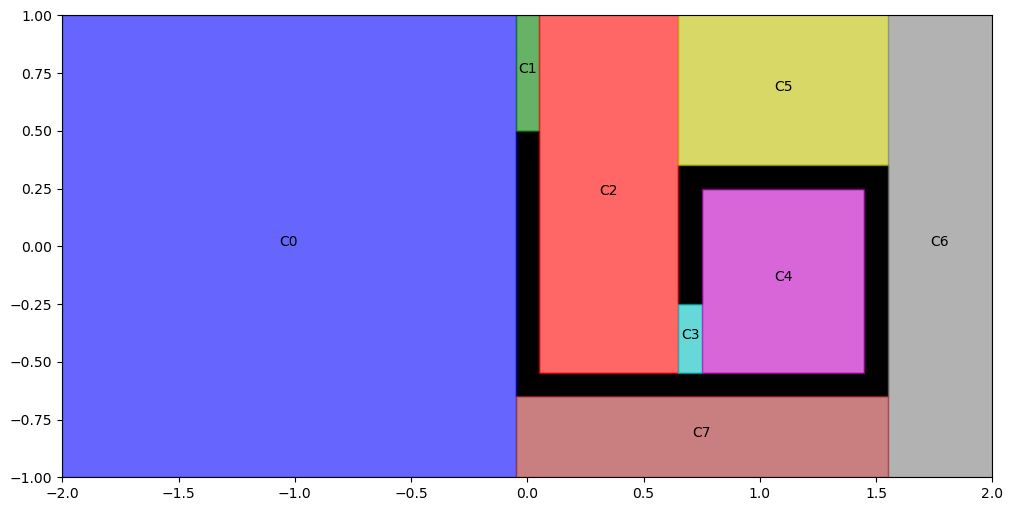

In [36]:

# (-0.05, 0.5), (0.05, 0.5), (0.05, -0.55), (1.45, -0.55), (1.45, 0.25), (0.75, 0.25),
# (0.75, -0.25), (0.65, -0.25), (0.65, 0.35), (1.55, 0.35), (1.55, -0.65), (-0.05, -0.65)))
trapezoids = [
    Polygon((-2, -1), (-2, 1), (-0.05, 1), (-0.05, -1)),
    Polygon((-0.05, 1), (-0.05, 0.5), (0.05, 0.5), (0.05, 1)),
    Polygon((0.05, 1), (0.05, -0.55), (0.65, -0.55), (0.65, 1)),
    Polygon((0.65, -0.25), (0.65, -0.55), (0.75, -0.55), (0.75, -0.25)),
    Polygon((0.75, 0.25), (0.75, -0.55), (1.45, -0.55), (1.45, 0.25)),
    Polygon((0.65, 1), (0.65, 0.35), (1.55, 0.35), (1.55, 1)),
    Polygon((1.55, 1), (1.55, -1), (2, -1), (2, 1)),
    Polygon((1.55, -0.65), (1.55, -1), (-0.05, -1), (-0.05, -0.65))
]

fig, ax = plt.subplots(figsize=(12, 6))

plt.fill([environment.vertices[i].x for i in range(len(environment.vertices))], [
         environment.vertices[i].y for i in range(len(environment.vertices))], color='black')

colours = ['b', 'g', 'r', 'c', 'm', 'y', 'grey', 'brown']
for i, poly in enumerate(trapezoids):
    plt.fill([poly.vertices[i].x for i in range(len(poly.vertices))], [
             poly.vertices[i].y for i in range(len(poly.vertices))], color=colours[i], alpha=0.6)
    ax.annotate(f'C{i}', (poly.centroid.x - 0.04, poly.centroid.y))

ax.set_xlim([-2, 2])
ax.set_ylim([-1, 1])

plt.show()


### Reeb Graph

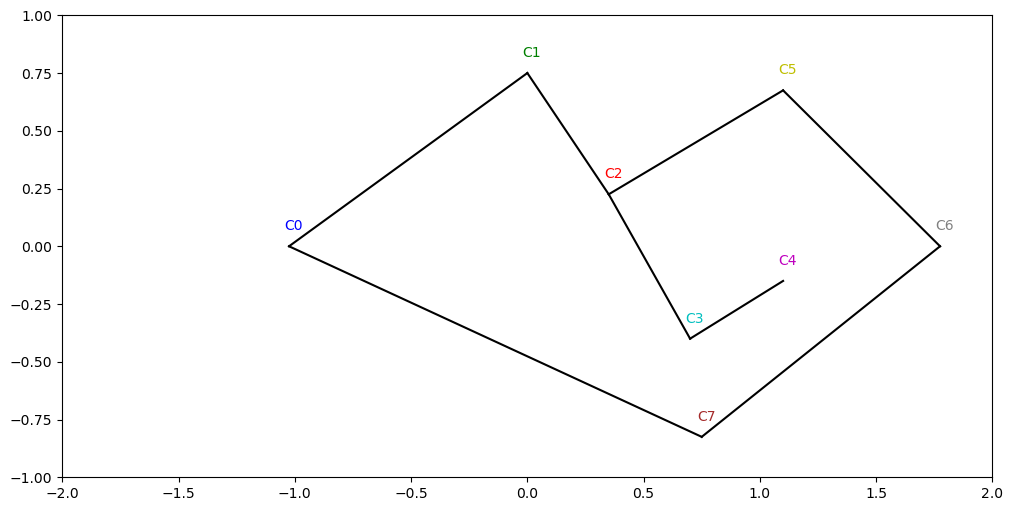

In [37]:
reeb_graph = []
for i, trap1 in enumerate(trapezoids):
    for trap2 in trapezoids[i+1:]:
        if len(trap1.intersection(trap2)) != 0:
            reeb_graph.append(Segment(trap1.centroid, trap2.centroid))

fig, ax = plt.subplots(figsize=(12, 6))

for segment in reeb_graph:
    plt.plot([segment.p1.x, segment.p2.x], [
             segment.p1.y, segment.p2.y], color='black')

for i, poly in enumerate(trapezoids):
    ax.annotate(f'C{i}', (poly.centroid.x-0.02,
                poly.centroid.y+0.07), color=colours[i])

ax.set_xlim([-2, 2])
ax.set_ylim([-1, 1])

plt.show()


## Q8

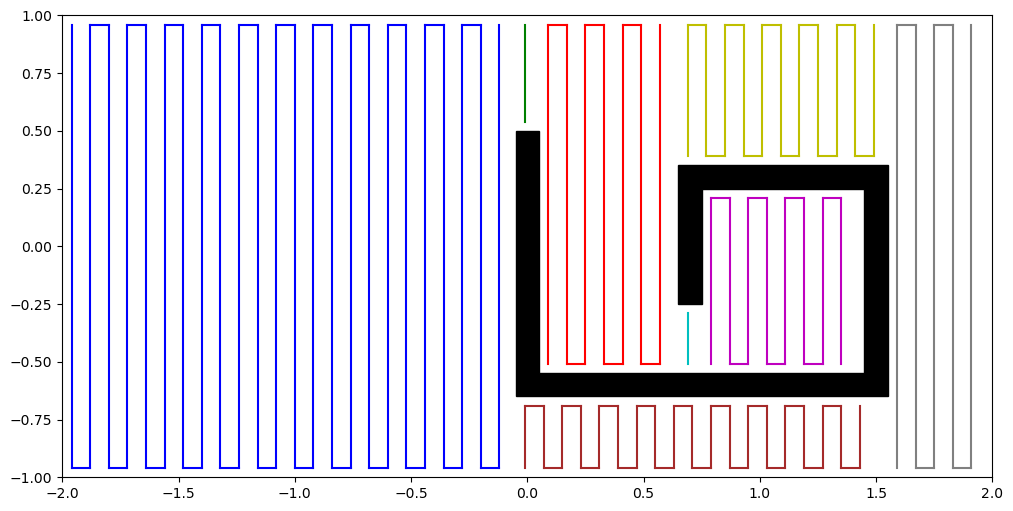

In [39]:
import numpy as np


def plot_lawnmower_pattern(environment, trapezoids, sensing_diameter):
    fig, ax = plt.subplots(figsize=(12, 6))
    for c, poly in enumerate(trapezoids):
        max_x0 = max([float(p.x) for p in poly.sides[0].points])
        max_x2 = max([float(p.x) for p in poly.sides[2].points])
        x_list = np.arange(min(max_x0, max_x2)+sensing_diameter/2,
                           max(max_x0, max_x2)-sensing_diameter/2, sensing_diameter)
        if len(x_list) == 0:
            pass
        else:
            coeffs_1 = Line(poly.sides[1]).coefficients
            y_list_1 = [((-coeffs_1[0]*x - coeffs_1[2])/coeffs_1[1])
                        for x in x_list]
            coeffs_3 = Line(poly.sides[3]).coefficients
            y_list_3 = [((-coeffs_3[0]*x - coeffs_3[2])/coeffs_3[1])
                        for x in x_list]
            if y_list_3[0] <= y_list_1[0]:
                for i in range(len(x_list)):
                    y_list_3[i] += sensing_diameter/2
                    y_list_1[i] -= sensing_diameter/2
            else:
                for i in range(len(x_list)):
                    y_list_3[i] -= sensing_diameter/2
                    y_list_1[i] += sensing_diameter/2
            segments = []
            for i in range(len(x_list)):
                x = x_list[i]
                segments.append(
                    Segment(Point(x, y_list_1[i]), Point(x, y_list_3[i])))
                if i % 2 == 0 and i != (len(x_list)-1):
                    segments.append(
                        Segment(Point(x_list[i], y_list_3[i]), Point(x_list[i+1], y_list_3[i+1])))
                elif i % 2 != 0 and i != (len(x_list)-1):
                    segments.append(
                        Segment(Point(x_list[i], y_list_1[i]), Point(x_list[i+1], y_list_1[i+1])))
            for segment in segments:
                plt.plot([segment.p1.x, segment.p2.x], [
                         segment.p1.y, segment.p2.y], color=colours[c])

    plt.fill([environment.vertices[i].x for i in range(len(environment.vertices))], [
        environment.vertices[i].y for i in range(len(environment.vertices))], color='black')

    ax.set_xlim([-2, 2])
    ax.set_ylim([-1, 1])

    plt.show()


plot_lawnmower_pattern(environment, trapezoids, 0.08)
